In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def f(x,y):
    return x + 2*y

In [4]:
def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4.

In [10]:
N = 10
t = np.linspace(0,1,N)

In [11]:
h = t[1] - t[0]

In [12]:
yext = Solucion(t)

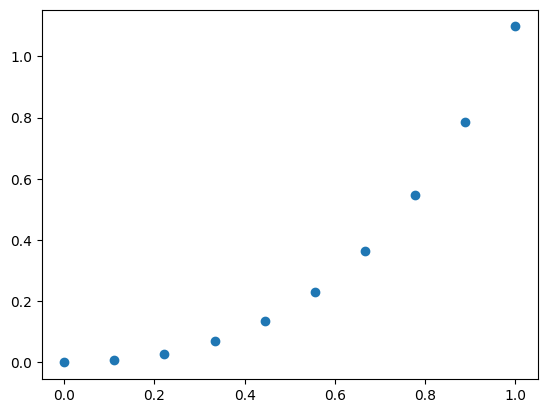

In [13]:
plt.scatter(t,yext)

In [14]:
def GetEuler(f, x, y0):
    h = x[1]-x[0]
    y = np.zeros_like(x)
    y[0] = y0
    
    for i in range(1,len(x)):
        k1 = f(x[i-1], y[i-1])
        y[i] = y[i-1]+h*k1
        
    return y

In [19]:
yrk1 = GetEuler(f,t,0)

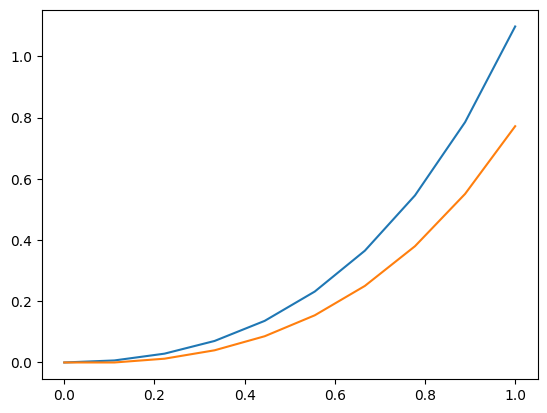

In [20]:
plt.plot(t,yext)
plt.plot(t,yrk1)

In [17]:
def GetAdams(f, x, yrk1):
    h = x[1] - x[0]
    y = yrk1.copy()
    
    for i in range(2, len(x)):
        y[i] = y[i-1] + 0.5*h*(3*f(x[i-1], y[i-1]) - f(x[i-2], y[i-2])) 
        # es un indice menor que en las notas
    return y

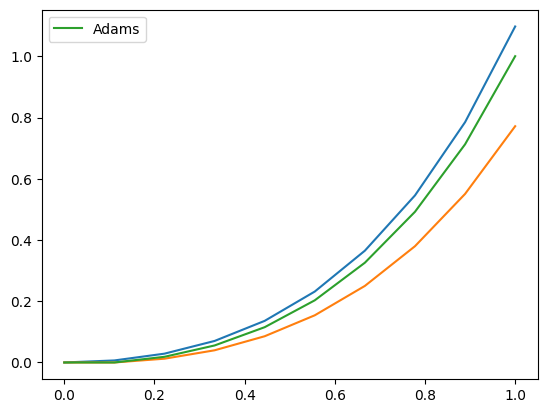

In [21]:
ybash2 = GetAdams(f,t,yrk1)
plt.plot(t,yext)
plt.plot(t,yrk1)
plt.plot(t,ybash2,label='Adams')
plt.legend()

In [24]:
def GetAdamsMoulton(f,x,yrk1):
    h = x[1] - x[0]
    y = yrk1.copy()
    
    yc = y.copy()
    
    for i in range(2, len(x)):
        y[i] = y[i-1] + 0.5*h*(3*f(x[i-1], y[i-1]) - f(x[i-2], y[i-2])) 
        # es un indice menor que en las notas
        
        yc[i] = y[i]
        
        yc[i] = yc[i-1] + 0.5*h*(f(x[i], y[i]) + f(x[i-1], y[i-1]))
        
    return y, yc

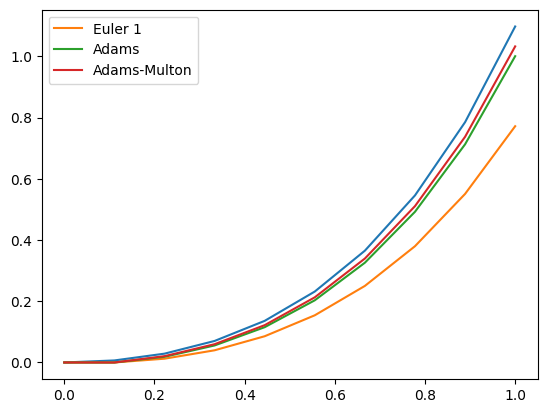

In [28]:
ybash2, ymulton2 = GetAdamsMoulton(f,t,yrk1)
plt.plot(t,yext)
plt.plot(t,yrk1, label = 'Euler 1')
plt.plot(t,ybash2, label='Adams')
plt.plot(t,ymulton2, label='Adams-Multon')
plt.legend()